<h1 style="color:orange">Image analysis with Python</h1>

Why image processing in Python?

Because an image is a MATRIX or a higher dimensional ARRAY of numbers that can be manipulated with Python.

In [ ]:
%pip install opencv-python
%pip install scikit-image

In [2]:
# Import libraries for image analysis
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
from PIL import Image

## Basic image processing

In [3]:
# Import the image using the cv2 library
image = cv2.imread('images/image_1.jpg')

# Inspect the image
print(image.shape)

(608, 910, 3)


The image `image_1.jpg` is a color image. For this reason we get a **3D array** when we read it. 
The first two dimensions are the height and width of the image, and the third dimension is the color channel (usually red, green, blue).

Let's try to plot the image. 

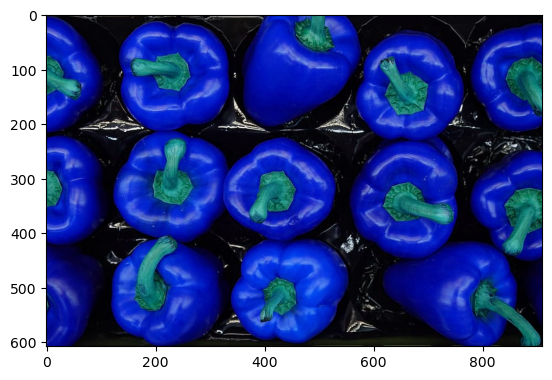

In [4]:
# Show the image
plt.imshow(image)
plt.show()

The image does not seem to display the true colors. This is because the `openCV` library reads the image in the BGR format, while `matplotlib` displays the image in the RGB format.

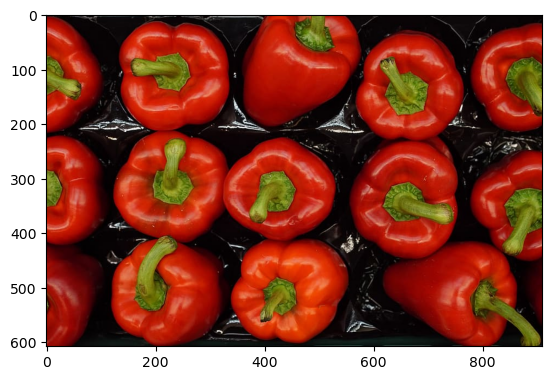

In [5]:
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image)
plt.show()

**Attention:** not all the import libraries read the images with inverted color channels. 

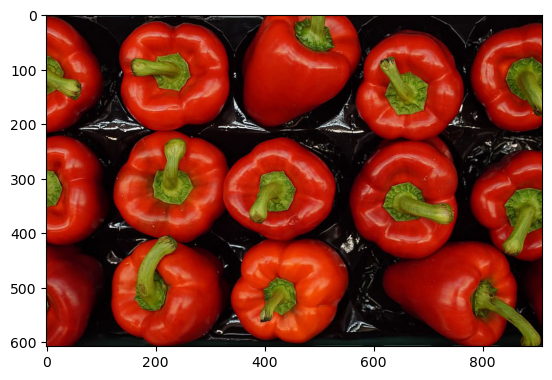

In [6]:
# Import with skimage
I = skimage.io.imread('images/image_1.jpg')

# Show the image
plt.imshow(I)
plt.show()

Now let's inspect the values of the image. We can see that the values are in the range [0, 255]. This is because the image is stored in 8-bit format and values range from 0 (black) up to 255 ($= 2^8 - 1$).

Sometimes, dealing with colors is not necessary. For example, if we want to detect edges in the image, we can convert the image to grayscale. This is done by averaging the values of the three color channels.

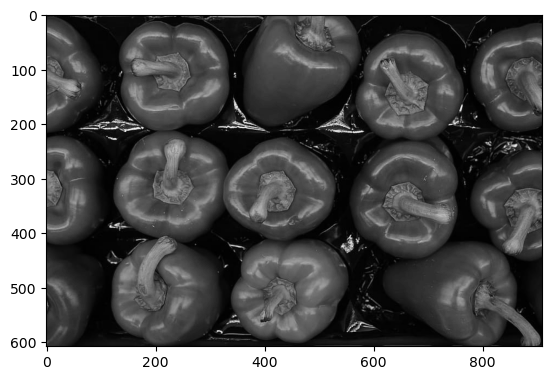

In [7]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Show the image
plt.imshow(image_gray, cmap='gray')
plt.show()

And if we inspect the size of the image, we can see that it is now a 2D array.

In [8]:
print(image_gray.shape)

(608, 910)


The image will have its own characteristic distribution of values. We can inspect the distribution of values with a histogram.

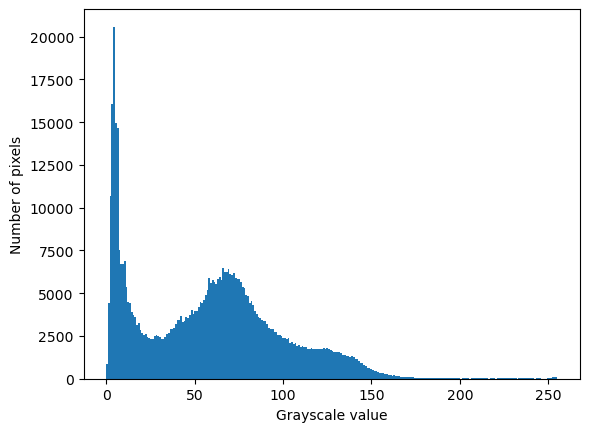

In [9]:
# Create a histogram of the image
plt.hist(image_gray.ravel(), bins=256, range=(0, 255))
plt.xlabel('Grayscale value')
plt.ylabel('Number of pixels')
plt.show()

## Operations on images

### Sum and substraction
It is possible to compute the sum or substraction of two images. This is done by adding the corresponding values of the two images.

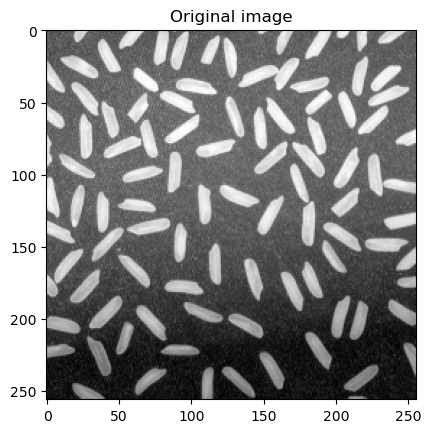

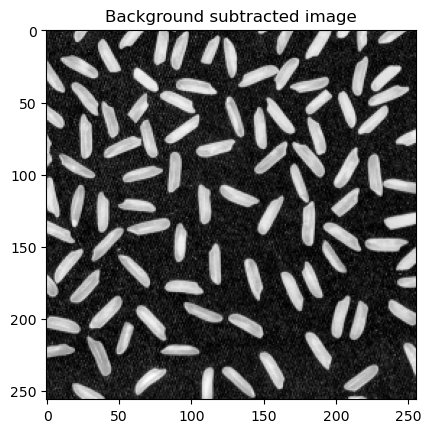

In [10]:
from skimage import io, morphology

# Load image
I = io.imread('images/rice.png')

# Perform background subtraction
background = morphology.disk(15)
background = morphology.opening(I, background)
I_sub = np.abs(I - background)

# Display images
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.show()

plt.imshow(I_sub, cmap='gray')
plt.title('Background subtracted image')
plt.show()

### Complement of an image

In the complement of a binary image, zeros become ones and ones become zeros; black and white are reversed. In the complement of an intensity or RGB image, each pixel value is subtracted from the maximum pixel value supported by the class (or 1.0 for double precision images) and the difference is used as the pixel value in the output image. In the output image, dark areas become lighter and light areas become darker. 

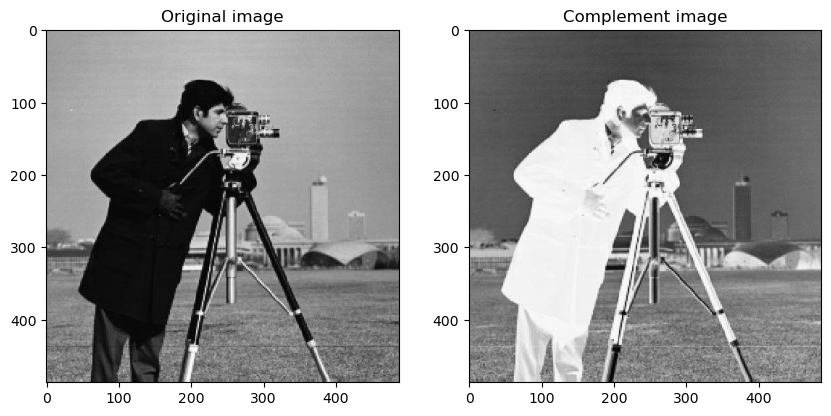

In [11]:
I = io.imread('images/cameraman.jpg')

# Create the complement image
J = 255 - I

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original image')
axes[1].imshow(J, cmap='gray')
axes[1].set_title('Complement image')
plt.show()


### Sharpening and blurring

Sharpening and blurring are operations that can be performed on images to enhance or reduce the contrast of the image.

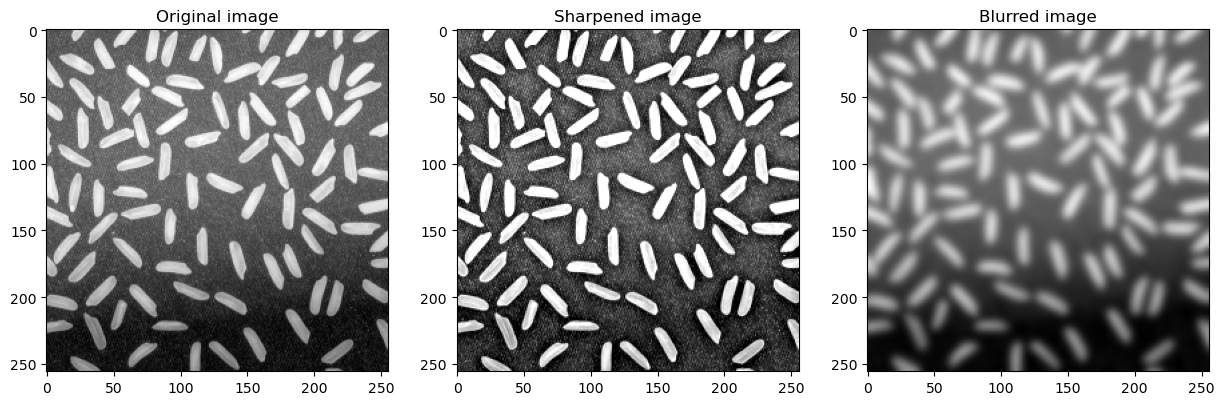

In [12]:
# Read the image
I = skimage.io.imread('images/rice.png')

# Sharpen the image
I_sharp = skimage.filters.unsharp_mask(I, radius=5, amount=2)

# Blur the image
I_blur = skimage.filters.gaussian(I, sigma=3)

# Plot the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original image')
axes[1].imshow(I_sharp, cmap='gray')
axes[1].set_title('Sharpened image')
axes[2].imshow(I_blur, cmap='gray')
axes[2].set_title('Blurred image')
plt.show()

### Crop, resize and rotate/traslate

- The crop operation is used to extract a sub-image from the original image. The sub-image is defined by the coordinates of the top-left corner and the bottom-right corner.
- The resize operation is used to change the size of the image. The new size is defined by the new width and height.
- The rotate operation is used to rotate the image. The rotation angle is defined in degrees.
- The translate operation is used to translate the image. The translation is defined by the number of pixels to move the image along the x and y axis. To apply it we use the `warp` function.

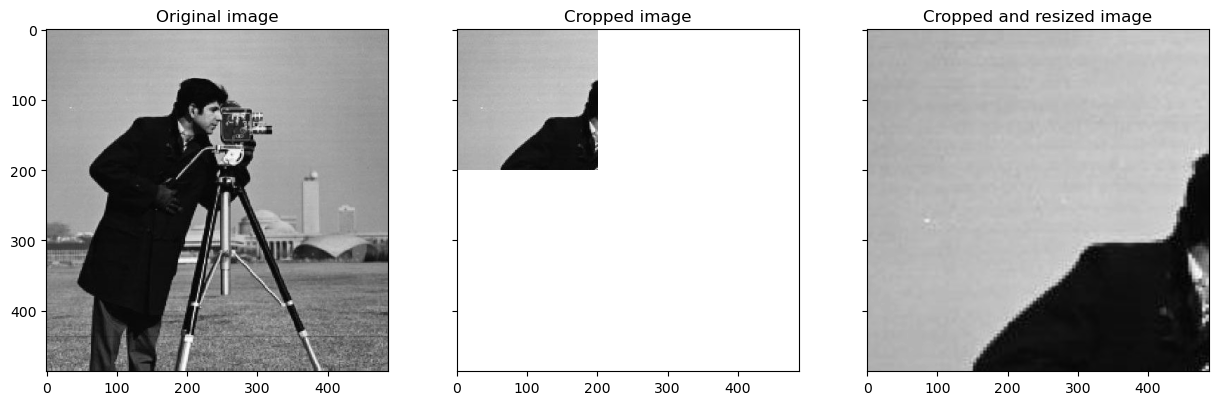

In [13]:
# Read the image
I = skimage.io.imread('images/cameraman.jpg')

# Crop the image
I_crop = I[0:200, 0:200]

# Make the cropped image the same size of the original
I_crop_resized = skimage.transform.resize(I_crop, I.shape)

# Plot the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original image')
axes[1].imshow(I_crop, cmap='gray')
axes[1].set_title('Cropped image')
axes[2].imshow(I_crop_resized, cmap='gray')
axes[2].set_title('Cropped and resized image')
plt.show()

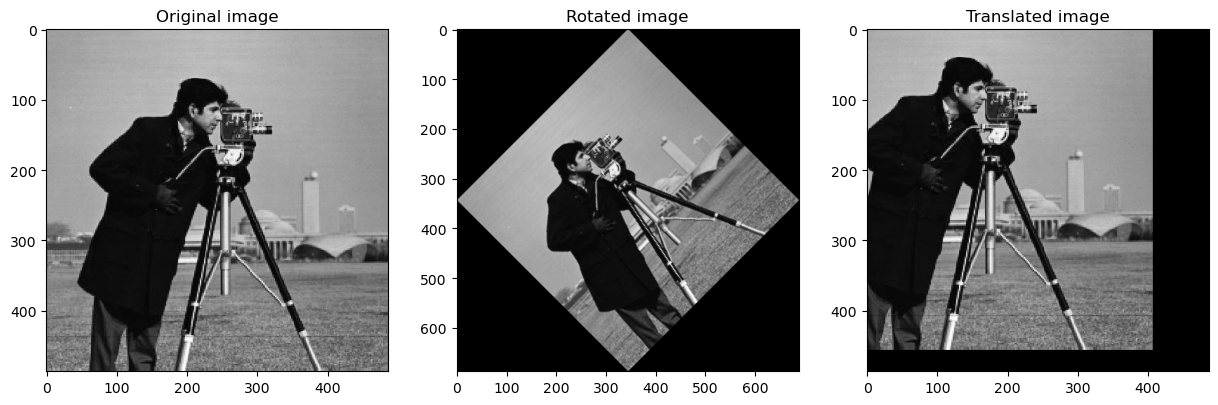

In [14]:
# Rotate the image
I_rot = skimage.transform.rotate(I, angle=45, resize=True)

# Define translation vector
tx = 80  # translation in x direction
ty = 30  # translation in y direction

# Construct transformation matrix
matrix = np.array([[1, 0, tx],
                   [0, 1, ty],
                   [0, 0, 1]])

# Apply transformation to image
I_tras = skimage.transform.warp(I, matrix)

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original image')
axes[1].imshow(I_rot, cmap='gray')
axes[1].set_title('Rotated image')
axes[2].imshow(I_tras, cmap='gray')
axes[2].set_title('Translated image')
plt.show()


The `warp` function can be used to apply a generic transformation to the image. The transformation is defined by a matrix that maps the coordinates of the original image to the coordinates of the new image. 
The function handles rototranslations, scaling, shearing, etc. and it is great for image registration (e.g., perspective correction). 

### Image segmentation

Image segmentation is the process of partitioning a digital image into multiple segments (sets of pixel). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

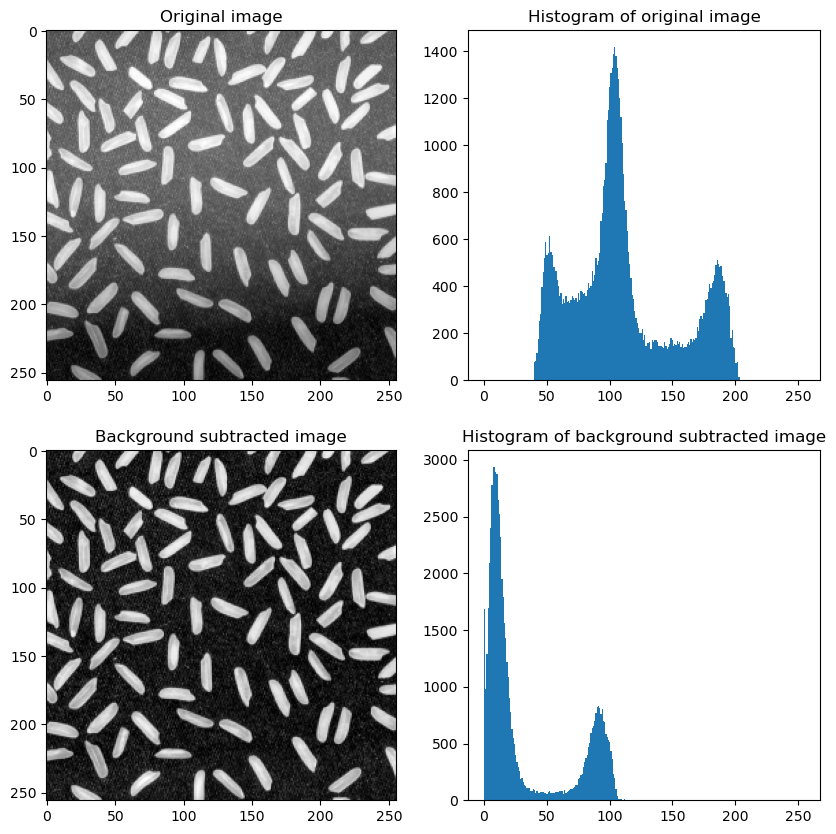

In [15]:
# Import the image
I = skimage.io.imread('images/rice.png')

# Compare the histogram of the original image and the background subtracted image
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(I, cmap='gray')
axs[0,0].set_title('Original image')
axs[0,1].hist(I.ravel(), bins=256, range=(0, 255))
axs[0,1].set_title('Histogram of original image')
axs[1,0].imshow(I_sub, cmap='gray')
axs[1,0].set_title('Background subtracted image')
axs[1,1].hist(I_sub.ravel(), bins=256, range=(0, 255))
axs[1,1].set_title('Histogram of background subtracted image')
plt.show()


Separating background from foreground is easier on the background subtracted image. Let's perform the segmentation on it. 

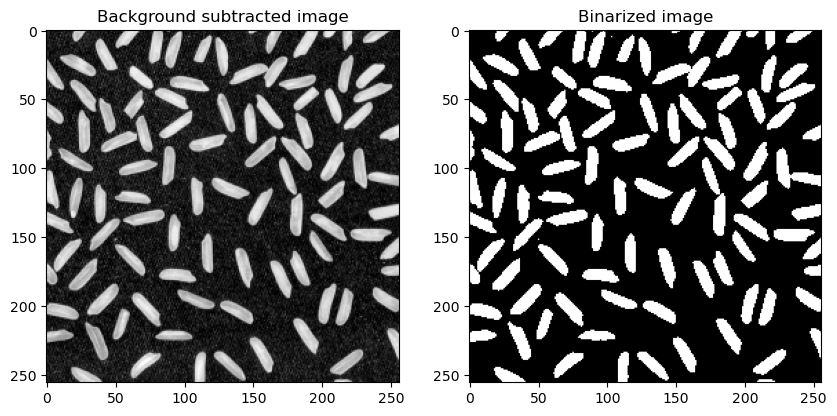

In [16]:
# Binarize the I_sub image using Otsu method
otsu_threshold = skimage.filters.threshold_otsu(I_sub)
I_bin = I_sub > otsu_threshold

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(I_sub, cmap='gray')
axes[0].set_title('Background subtracted image')
axes[1].imshow(I_bin, cmap='gray')
axes[1].set_title('Binarized image')
plt.show()

The binarization operation yields a binary image where:
- Black = background
- White = foreground

Each foreground region is referred to as a "connected component", i.e., a cluster of pixels having the same intensity value and being connected to each other. 

It is possible to compute several quantities for each connected component of an image. 

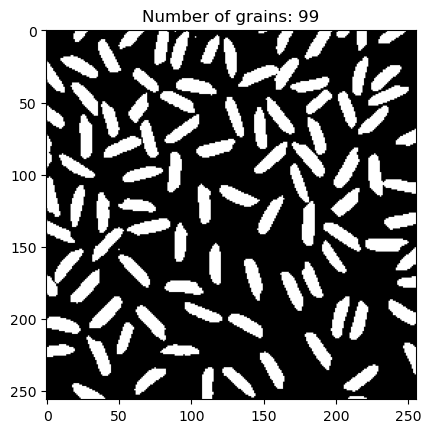

Grains areas: [61, 130, 186, 5, 17, 119, 187, 46, 91, 118, 197, 140, 1, 179, 189, 208, 189, 404, 138, 186, 151, 180, 219, 199, 201, 146, 192, 182, 154, 188, 213, 177, 121, 185, 200, 221, 197, 192, 191, 104, 68, 206, 209, 209, 234, 236, 210, 176, 376, 399, 189, 178, 203, 189, 216, 191, 197, 215, 168, 178, 217, 157, 184, 221, 197, 224, 156, 194, 122, 286, 1, 199, 218, 189, 216, 215, 85, 195, 233, 217, 184, 204, 184, 222, 204, 195, 151, 217, 224, 111, 133, 152, 213, 205, 187, 155, 190, 143, 23]


In [17]:
# Label connected components
labels = skimage.measure.label(I_bin)

# Compute area of connected components
props = skimage.measure.regionprops(labels)
area = [prop.area for prop in props]

# Display results
plt.imshow(I_bin, cmap='gray')
plt.title(f"Number of grains: {len(area)}")
plt.show()

print(f"Grains areas: {area}")

*Note: the area is the number of pixels of the component.*

Characterization of connected components. Plot the centroid of each connected component. 

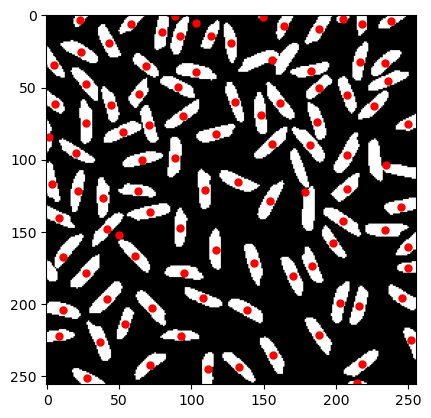

In [18]:
# Plot the centroids as red dots on the binarized image
fig, ax = plt.subplots()
ax.imshow(I_bin, cmap='gray')
for prop in props:
    ax.plot(prop.centroid[1], prop.centroid[0], 'ro', markersize=5)
plt.show()